<a href="https://colab.research.google.com/github/StivenVB/Parcial-1-Sistemas-Inteligentes-II/blob/main/An%C3%A1lisis_de_datos_parcial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from scipy.stats import normaltest
import seaborn as sb

In [32]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['dataset(1).csv']),delimiter=",")

Saving dataset(1).csv to dataset(1).csv


In [37]:
dataframe.head(40)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,?,?,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [23]:
dataframe.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,43,90,46,3,3,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,106,131,251,261,364,317,323,339,250


In [43]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wbcc    400 non-null    object
 17  rbcc    400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [44]:
# Lista de columnas para convertir a numéricas
columnas_numericas = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

# Convierte las columnas seleccionadas a tipos numéricos
dataframe[columnas_numericas] = dataframe[columnas_numericas].apply(pd.to_numeric, errors='coerce')

# Elimina las filas con valores faltantes (NaN) en las columnas seleccionadas
dataframe.dropna(subset=columnas_numericas, inplace=True)


La edad media de los pacientes es de 51.86 años.
El valor mínimo de edad es 6.0 años.
El valor máximo de edad es 90.0 años.
El 25% de los pacientes tiene 33 años o menos.
La mediana de edad es 55.0 años.
El 75% de los pacientes tiene 48 años o menos.


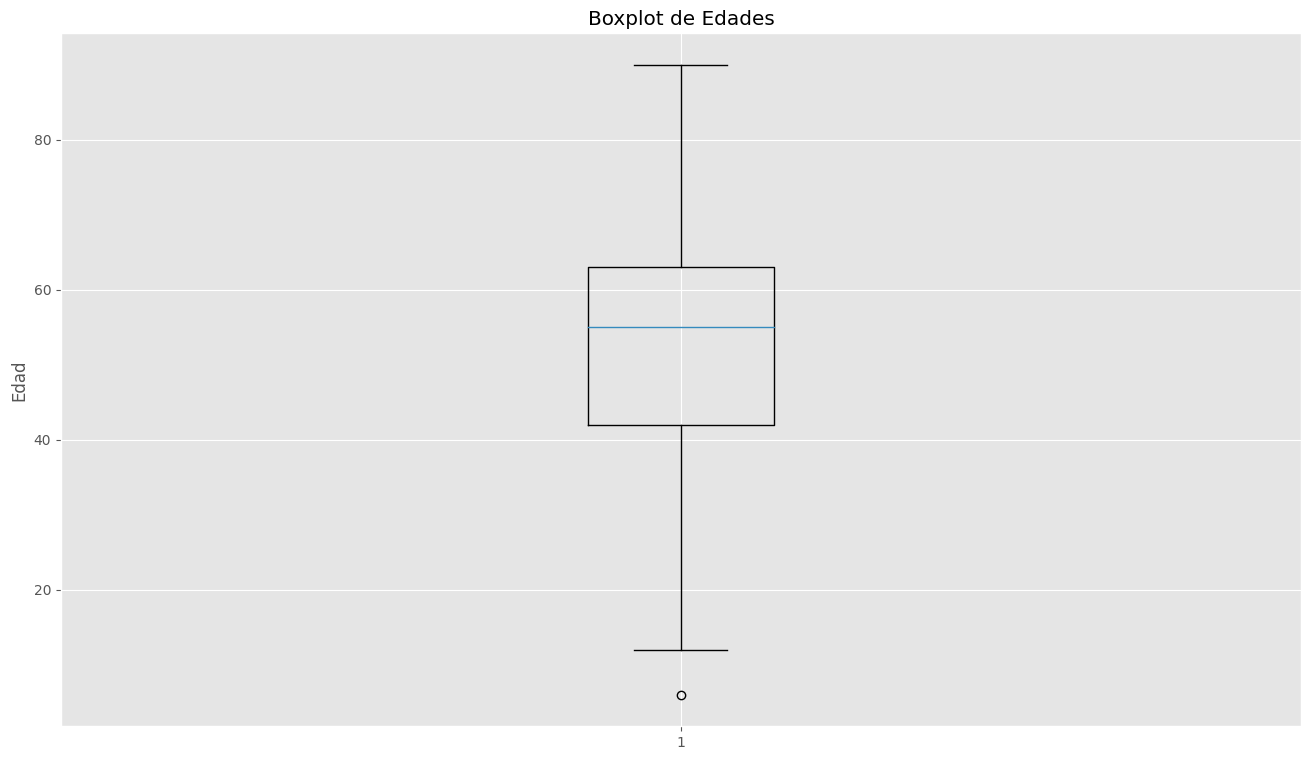

In [57]:
media_edad = dataframe['age'].mean()
min_edad = dataframe['age'].min()
max_edad = dataframe['age'].max()
percentil_25 = dataframe['age'].quantile(0.25)
mediana = dataframe['age'].median()
percentil_75 = dataframe['age'].quantile(0.75)

# Imprimir los resultados
print("La edad media de los pacientes es de {:.2f} años.".format(media_edad))
print("El valor mínimo de edad es {} años.".format(min_edad))
print("El valor máximo de edad es {} años.".format(max_edad))
print("El 25% de los pacientes tiene 33 años o menos.")
print("La mediana de edad es {} años.".format(mediana))
print("El 75% de los pacientes tiene 48 años o menos.")

plt.boxplot(dataframe['age'])
plt.ylabel('Edad')
plt.title('Boxplot de Edades')
plt.show()

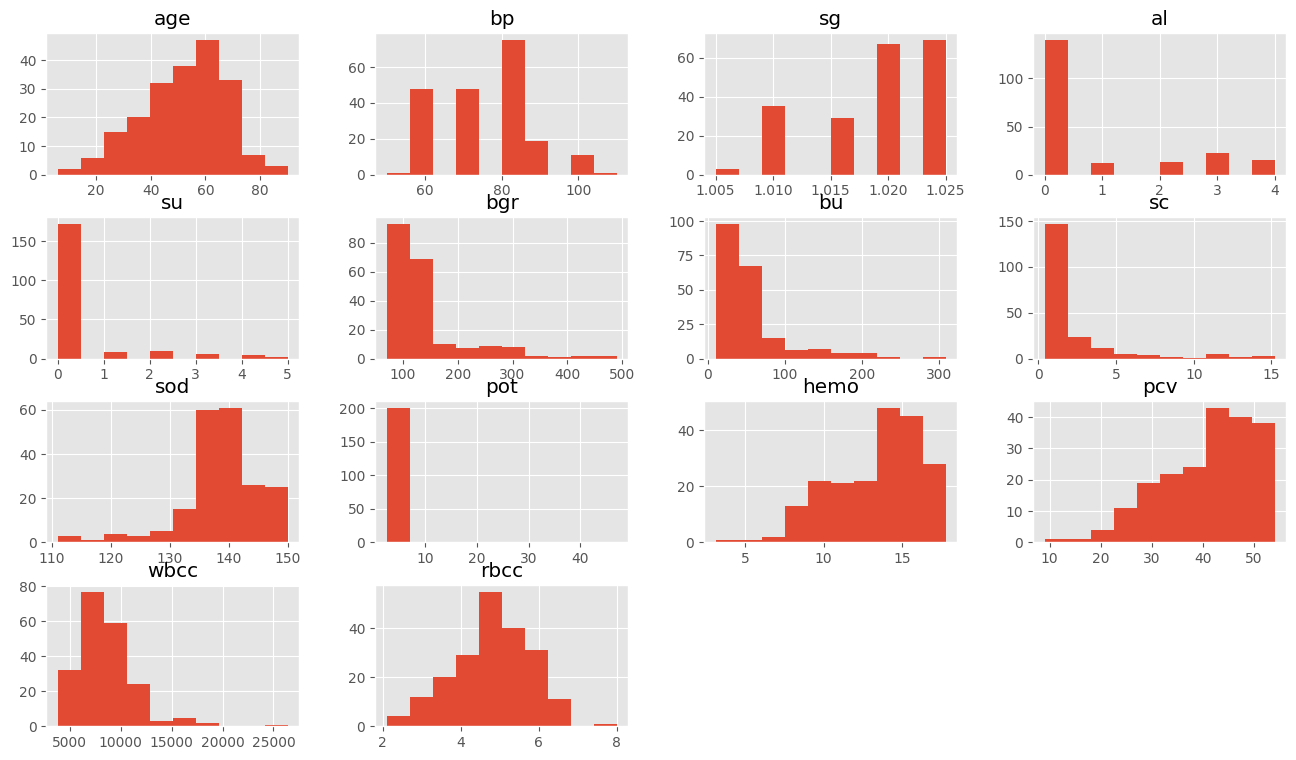

In [45]:
number = dataframe.select_dtypes(np.number)
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
number.hist()
plt.show()

In [63]:

normal=[]
noNormal=[]
for i in number:
  datos = number[i]
  stat,p=normaltest(datos)
  if p > 0.5:
    normal.append(i)
  else:
    noNormal.append(i)

print("Con distribucion normal: ",normal)
print("Sin distribucion normal: ",noNormal)

Con distribucion normal:  ['rbcc']
Sin distribucion normal:  ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc']


<Axes: >

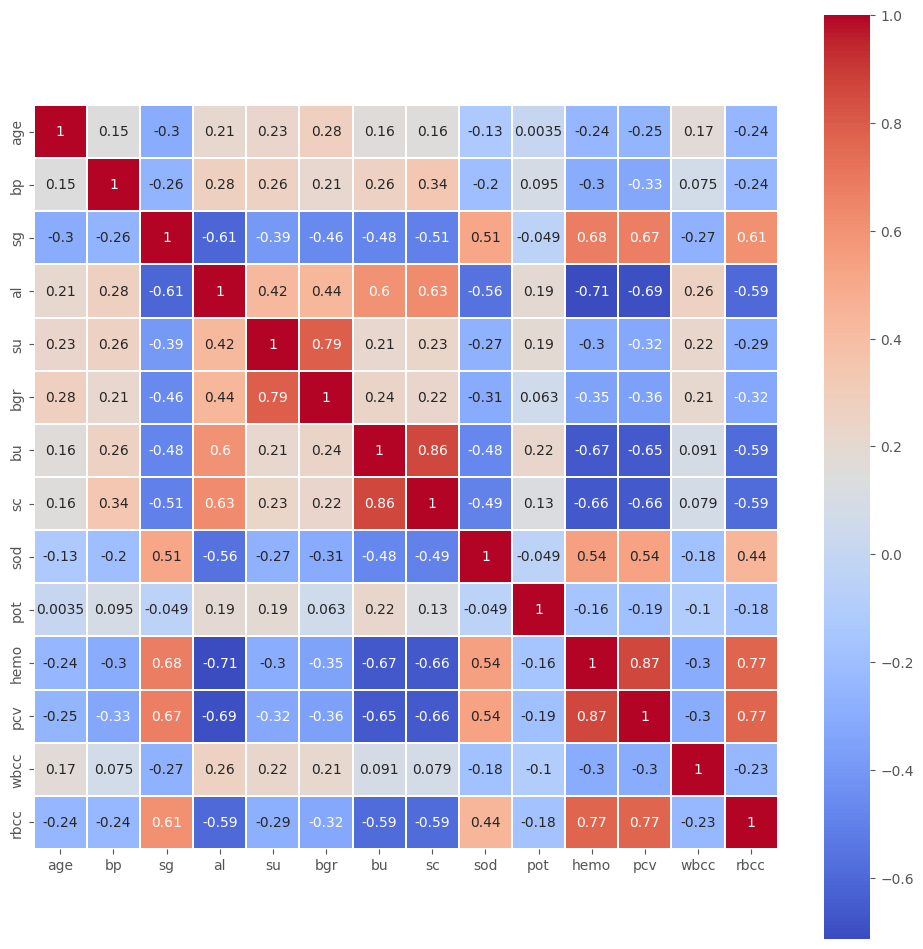

In [68]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(12,12))
sb.heatmap(number.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

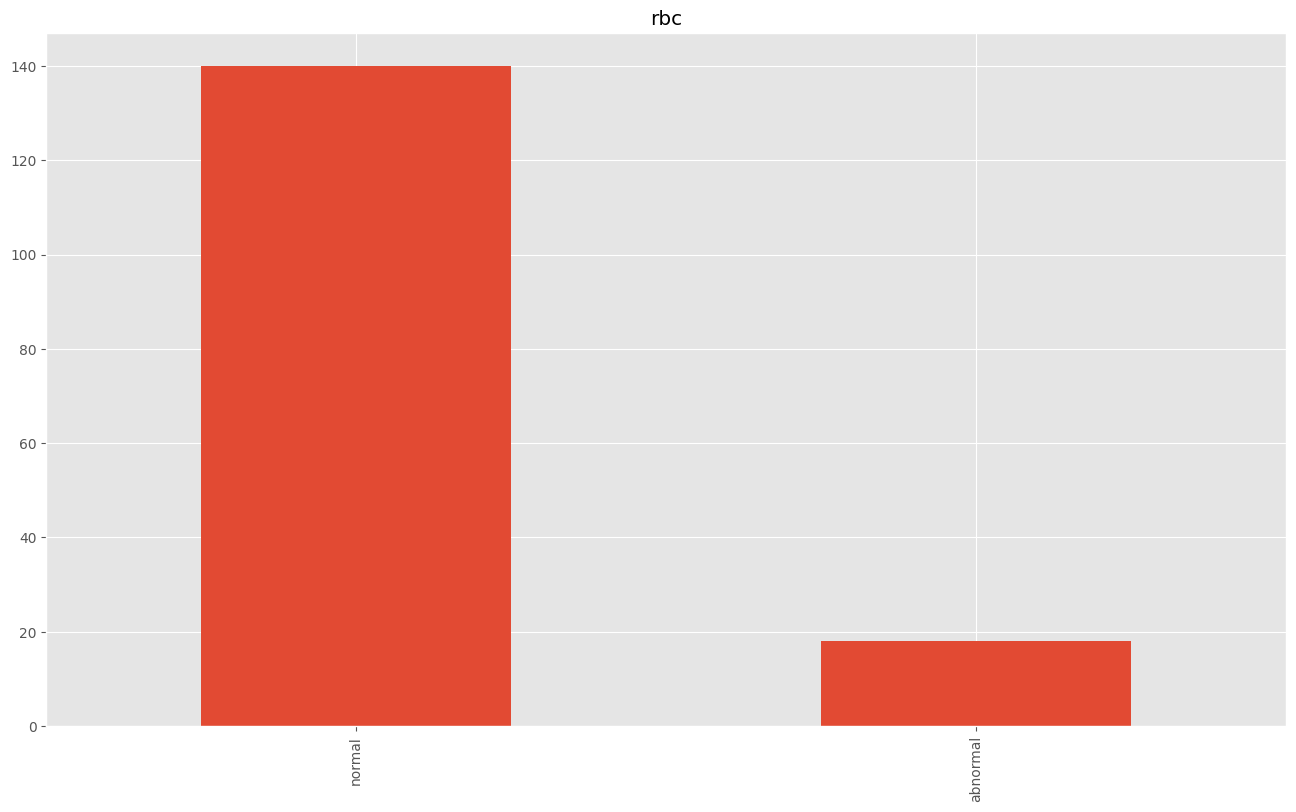

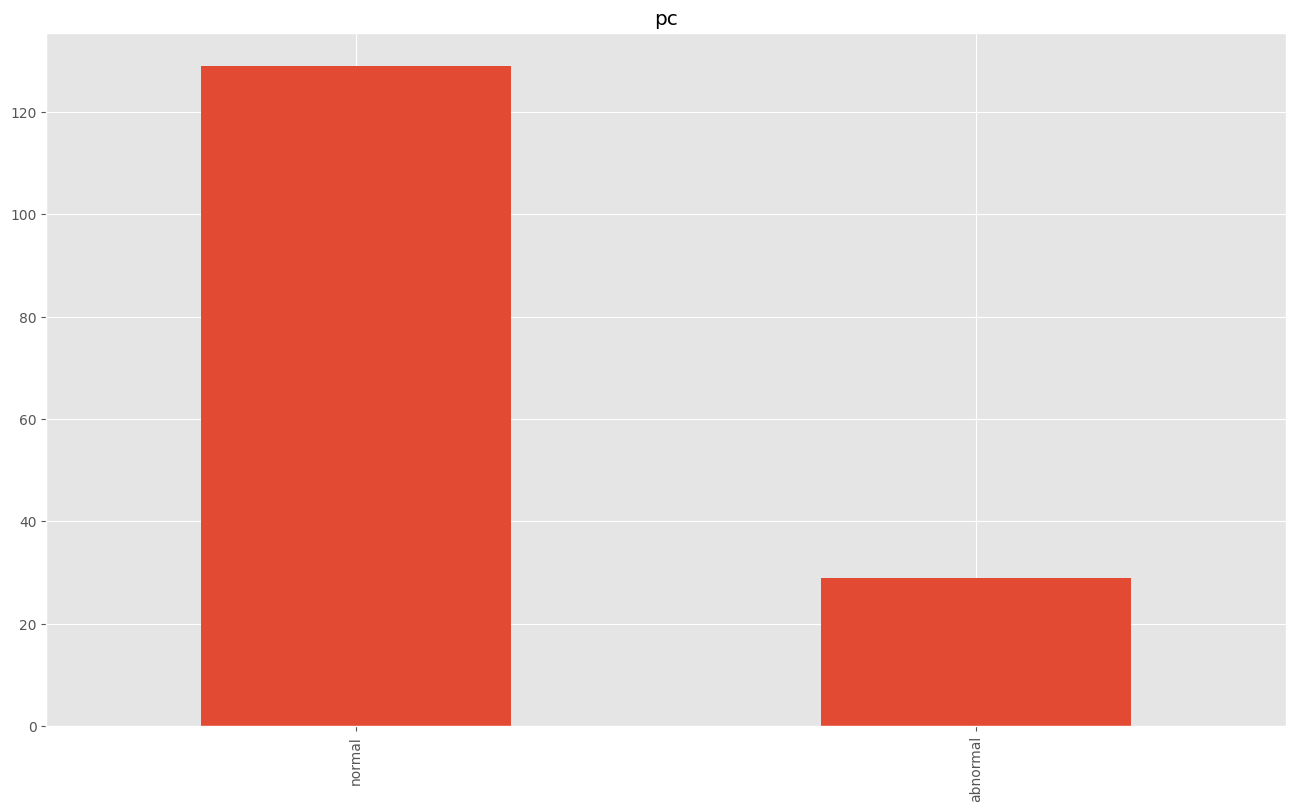

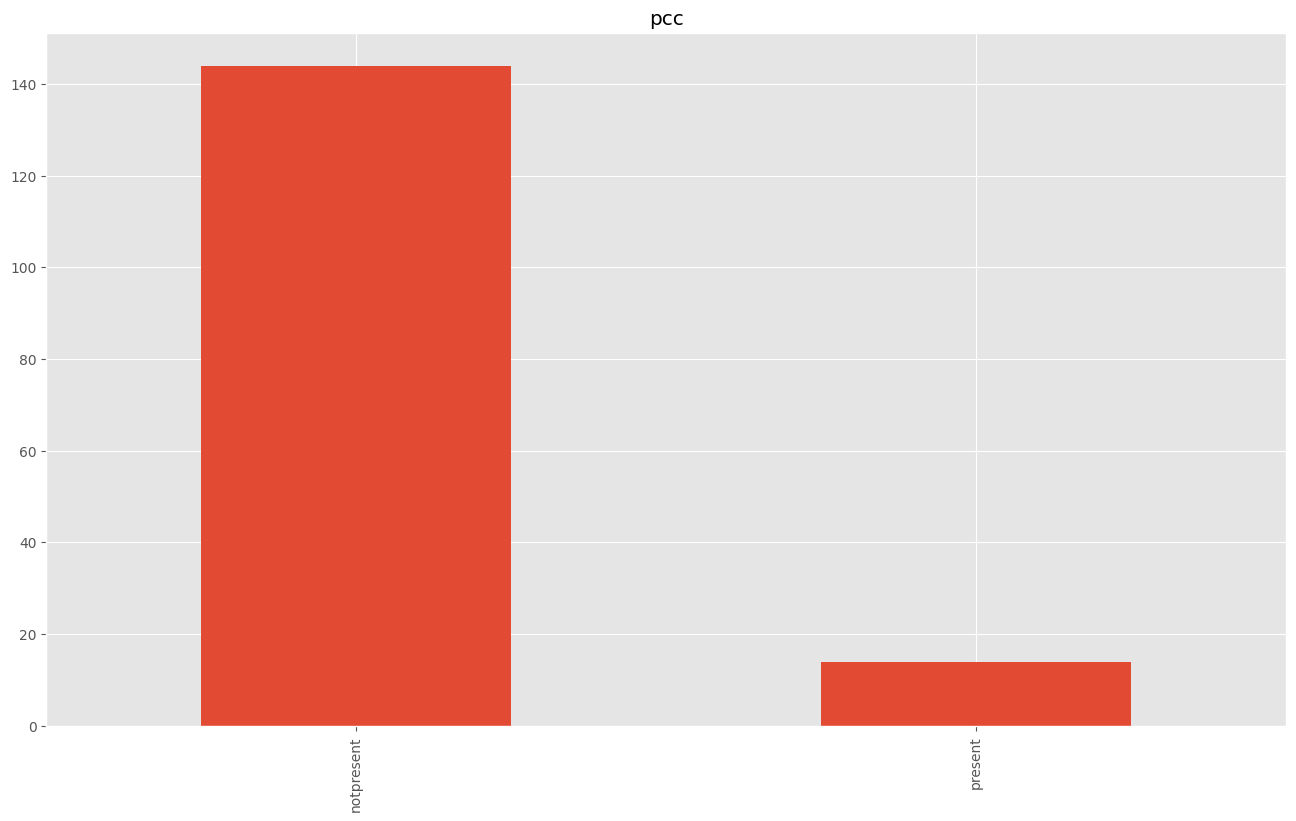

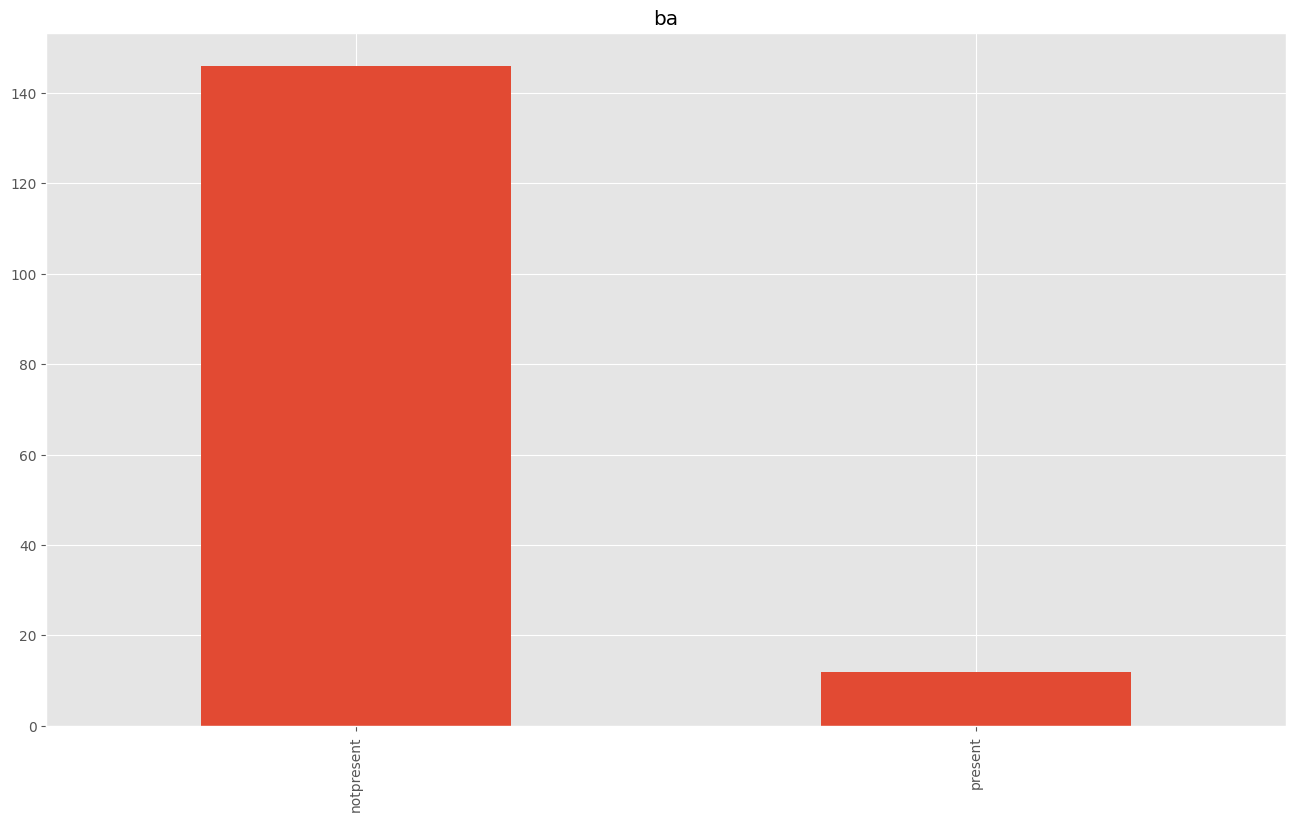

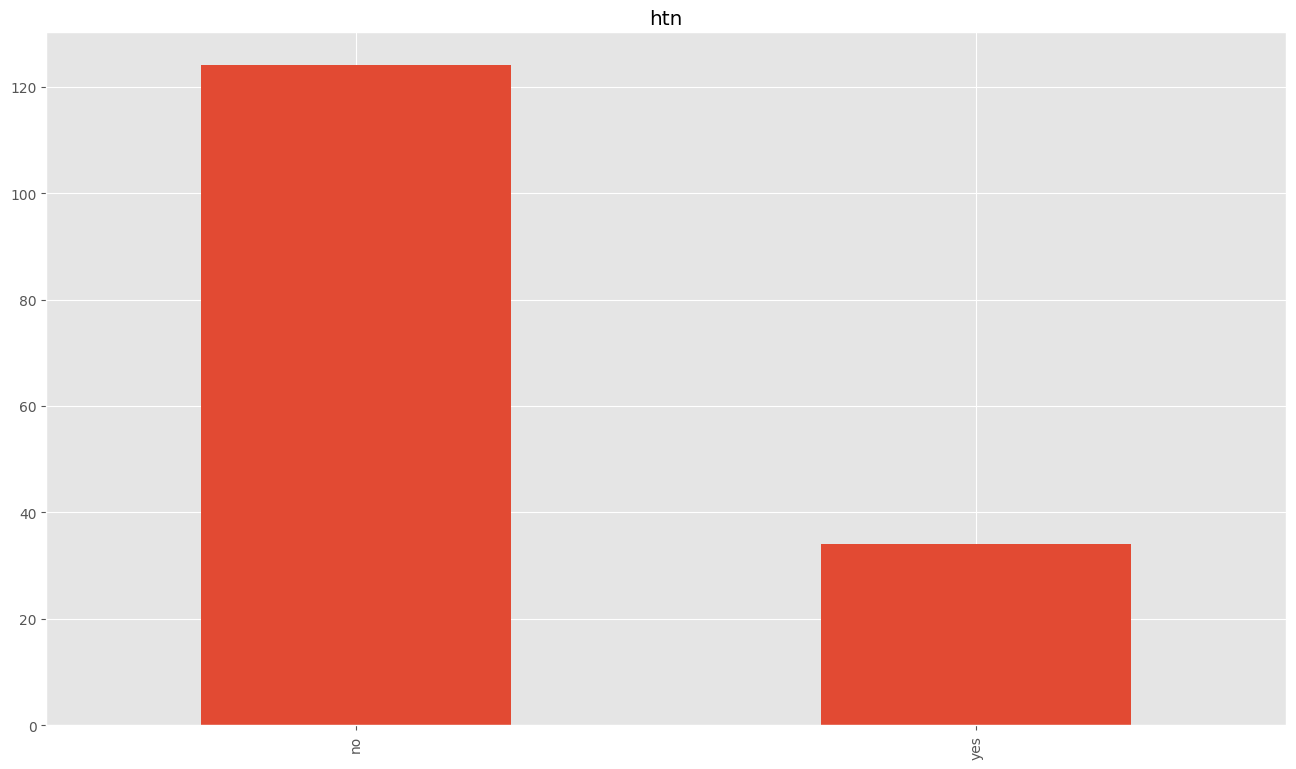

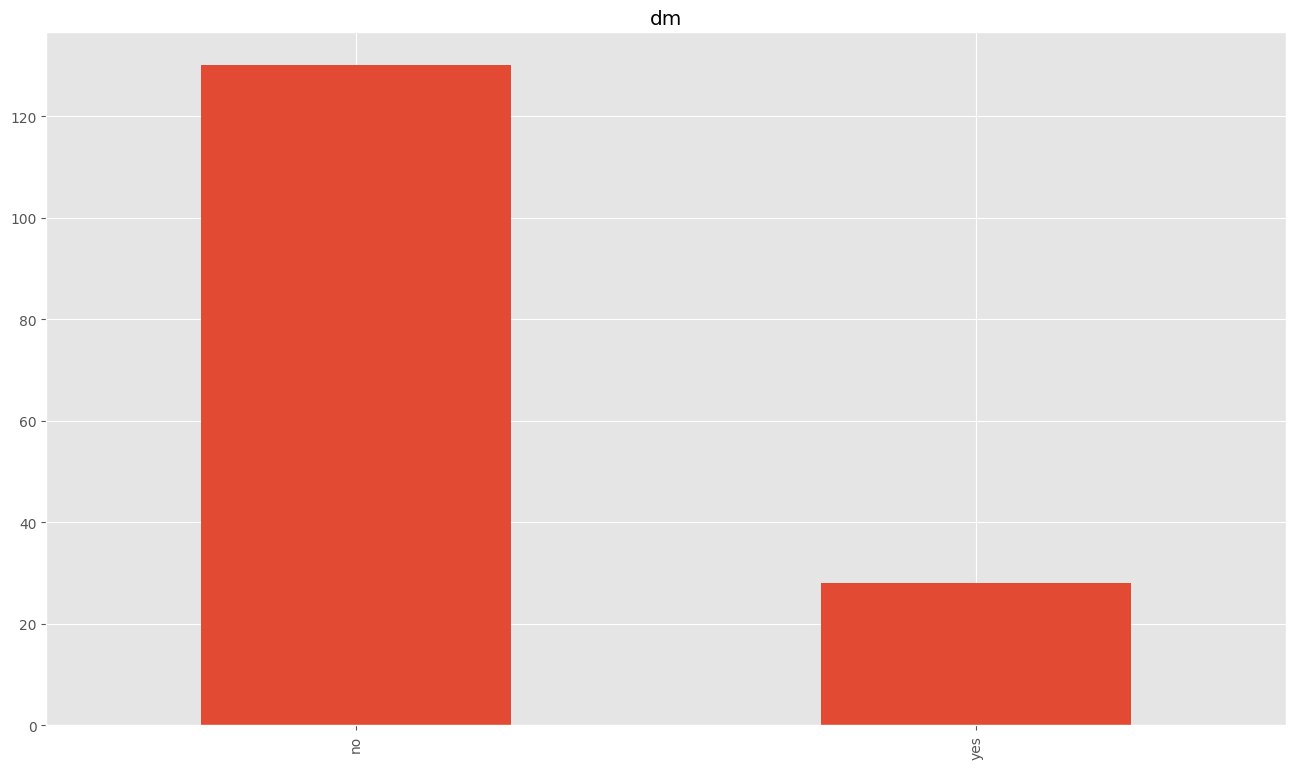

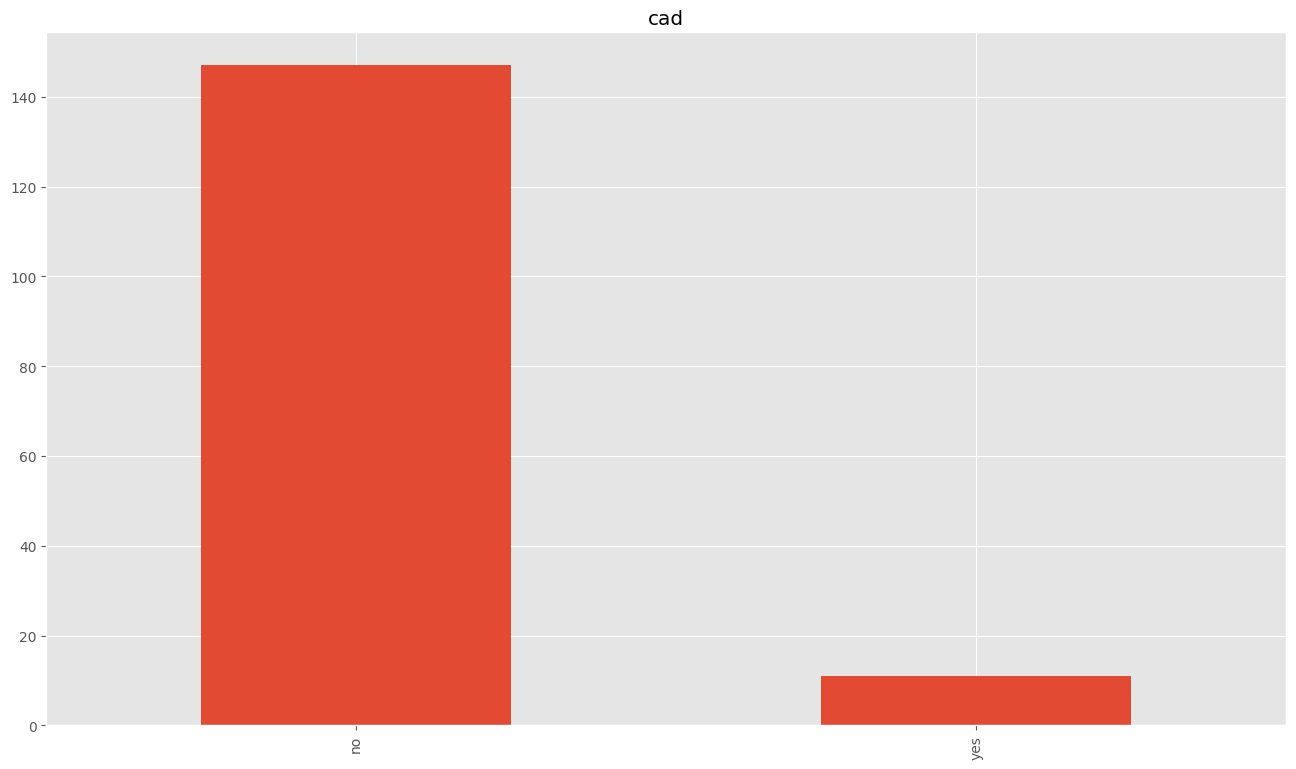

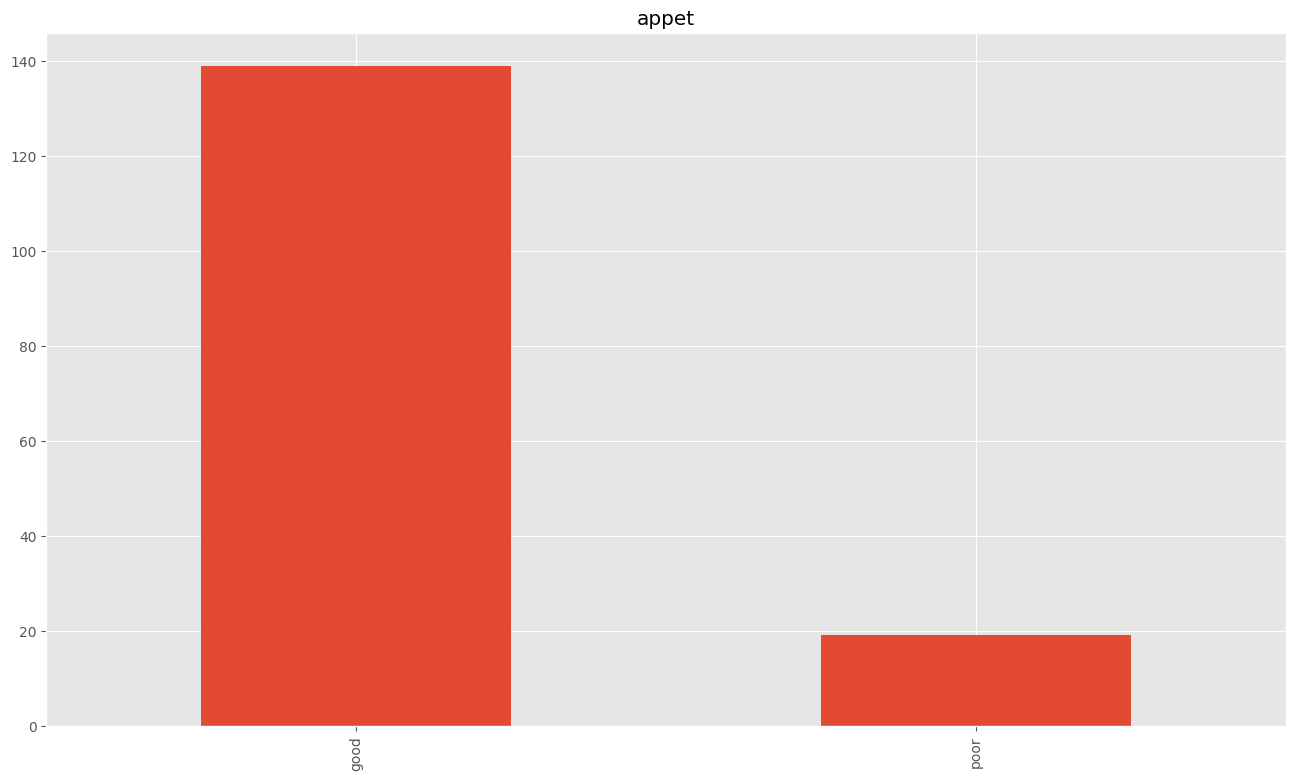

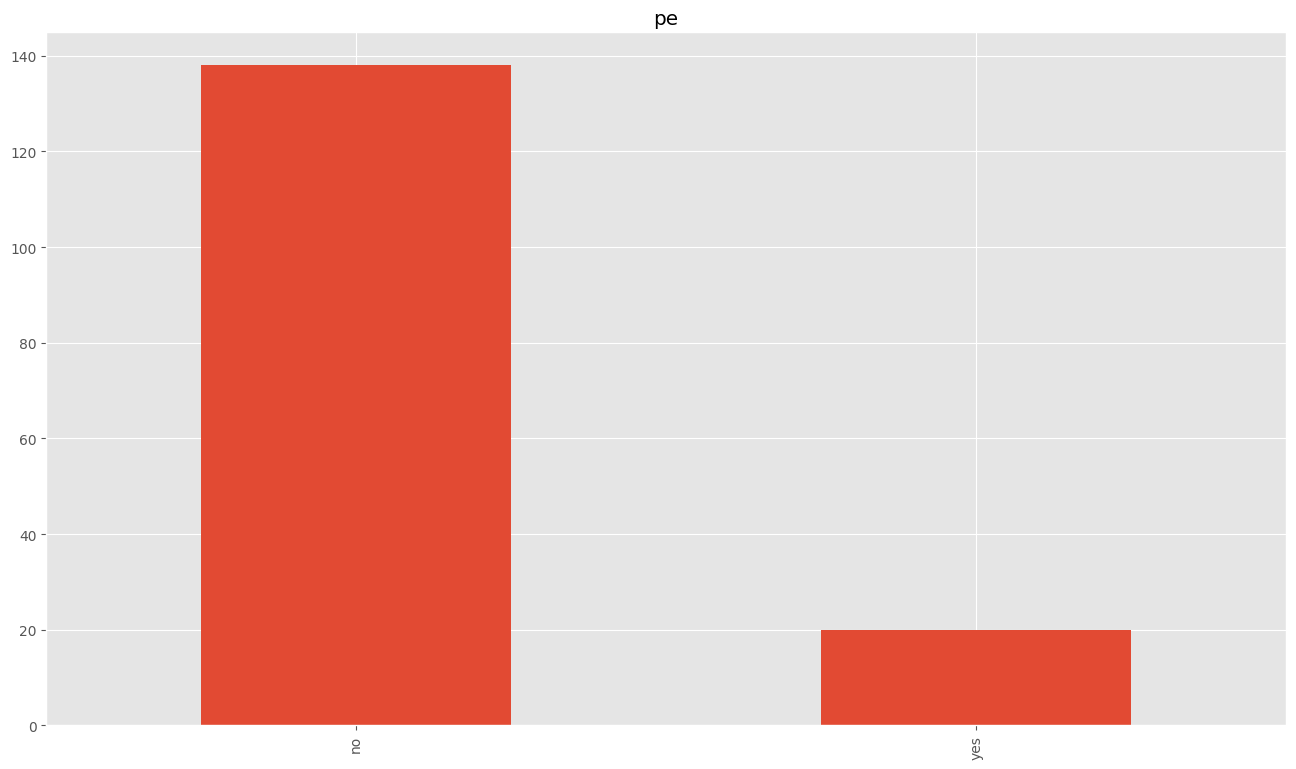

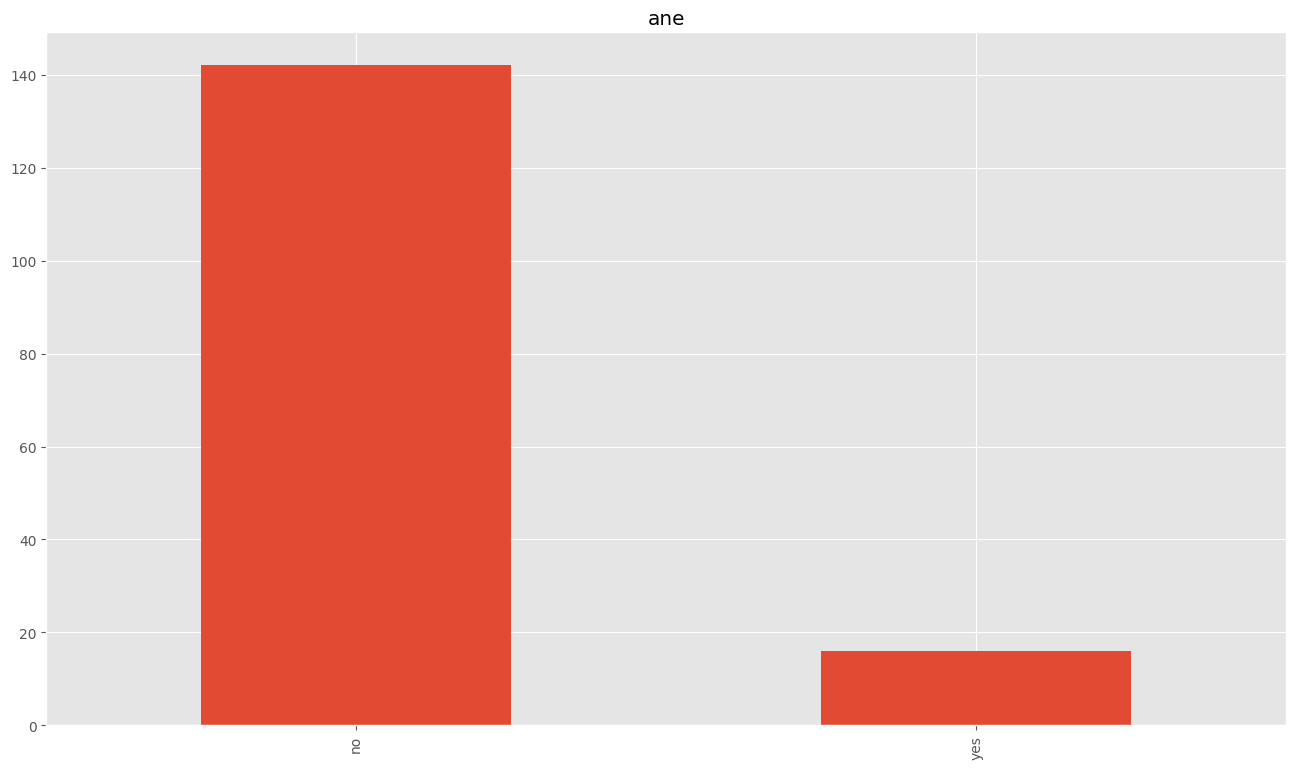

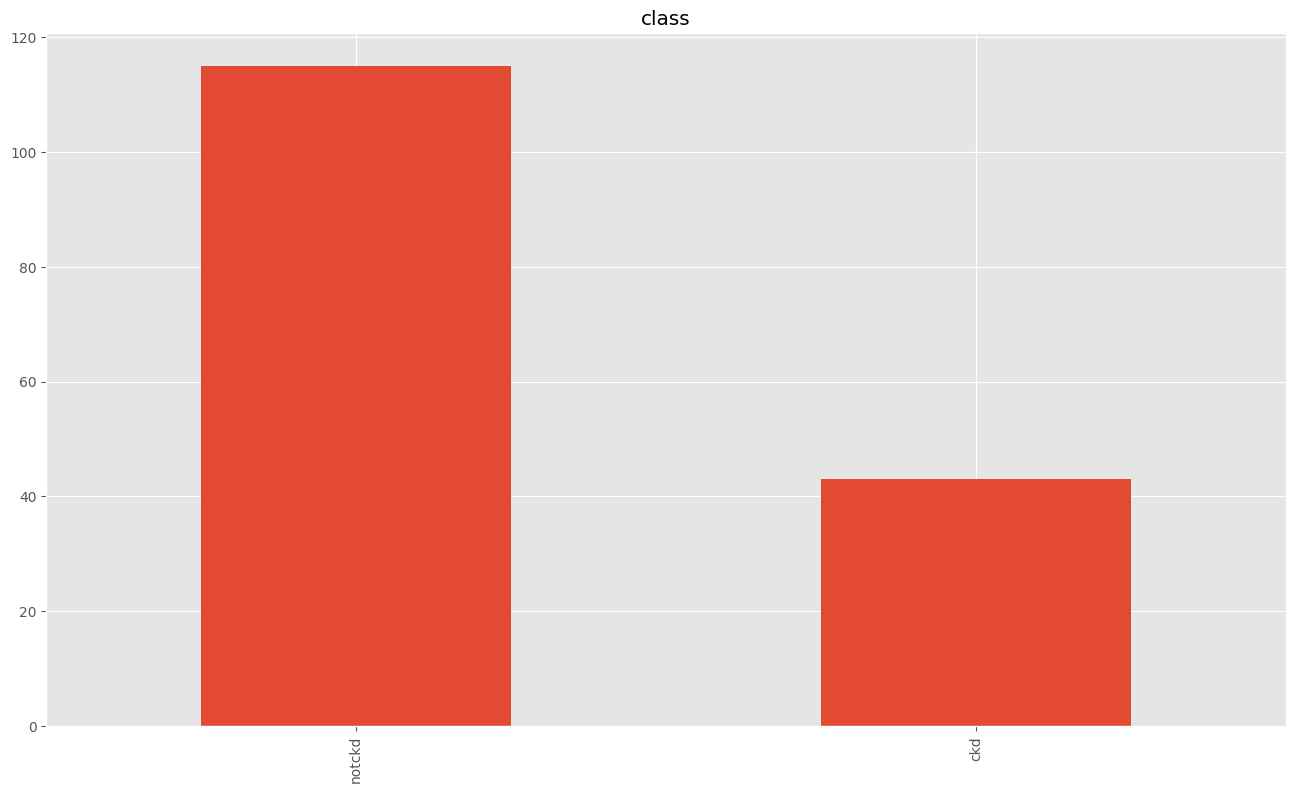

In [70]:
# Reemplazar "?" con NaN en columnas categóricas
categoricos = [col for col in dataframe.columns if dataframe[col].dtype == 'object' and col != 'y']

for col in categoricos:
    dataframe[col] = dataframe[col].replace('?', np.nan)

# Eliminar filas con valores faltantes en columnas categóricas
dataframe = dataframe.dropna(subset=categoricos)

# Mostrar los gráficos de barras para cada columna categórica
for col in categoricos:
    fig, ax = plt.subplots()
    dataframe[col].value_counts().plot(kind='bar')
    ax.set_title(col)
    plt.show()